<a href="https://colab.research.google.com/github/yaya1721/ML-spring22/blob/main/ML_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 1
Dania Herzalla dh2741 <br>
Long Phan lvp243 <br>
Sonya Hsieh yh3529 <br>


## Problem 1 & 2

Completed the questions.

## Problem 3

Part 1

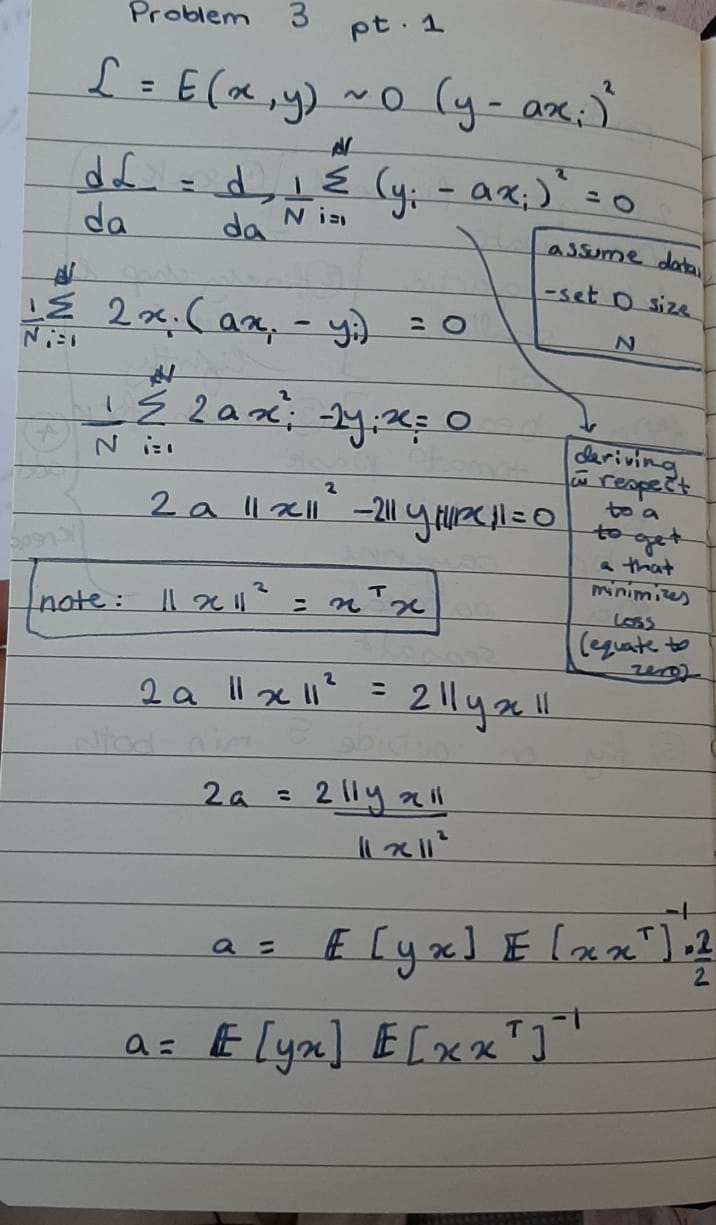

Part 2

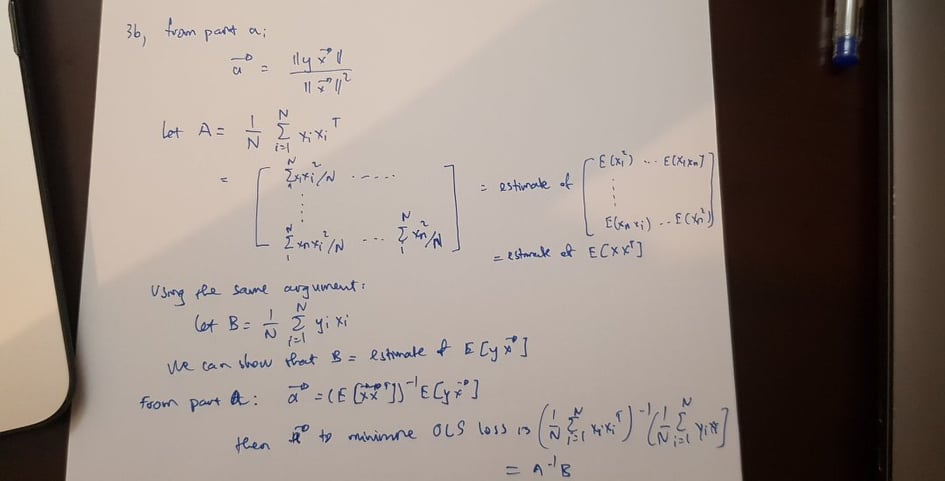

Part 3

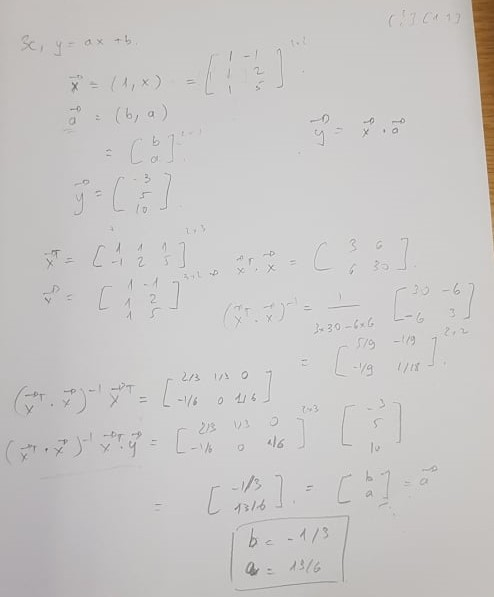

## Problem 4

Exploring regression using the Boston Housing dataset.

In [ ]:
#imports
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np
import statistics

In [ ]:
# Loading boston dataset
df = load_boston()
print(df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# Obtaining input and output data
# Standardizing input data by scaling and translating each dimension of the input data so that the mean and variance along each dimension are 0 and 1 respectively.
X = StandardScaler().fit_transform(df.data)
y = df.target

<class 'numpy.ndarray'>


Our task: 


1.   Split the data set into training and test set with the test size parameter set to 0.4
2.   Train an ordinary least squares (OLS) regression model on the training set
3.   Record training and test error, and the gap between the two
(use mean squared error)
4.   Repeat the experiment several times (with different train and test splits) and report the mean and standard deviation of the three quantities.
5.   Expand the set of features (add a constant feature 1 for homogenization) and the product of each pair of the existing features (including the squares of each of the features).
6.   Repeat steps 1-5 with Ridge regression instead of OLS with different values of the parameter α and select the value of α for which the test results are the best.   
   
(advisable to do this experiment with otherdatasets to gain further insight into feature expansion and regularization.)



### OLS Regression

In [ ]:
# Using the function train test split with the test size parameter set to 0.4.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

# Train OLS regression model
ln_regress_model = LinearRegression().fit(X_train, y_train)

# Record train and test error, and their difference
y_predict = ln_regress_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_predict)
y_predict2 = ln_regress_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_predict2)

print("Training error: % s " %(mse_train))
print("Test error:     % s " %(mse_test))
print("Gap:            % s " %(mse_test-mse_train))

Training error: 19.922603269113186 
Test error:     25.790362150702503 
Gap:            5.867758881589317 


In [ ]:
# Repeat the experiment several times and report the mean and standard deviation of the three quantities.
training_error = []
test_error = []
gap = []
for i in range(200, 500, 1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/1000, random_state = 0)

  # Train OLS regression model
  ln_regress_model = LinearRegression().fit(X_train, y_train)

  # Record train and test error, and their difference
  y_predict = ln_regress_model.predict(X_test)
  mse_test = mean_squared_error(y_test, y_predict)
  y_predict2 = ln_regress_model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_predict2)

  training_error.append(mse_train)
  test_error.append(mse_test)
  gap.append(mse_test - mse_train);
  #print(mse_train, mse_test, gap)
print("Mean of training error: % s " %(statistics.mean(training_error)))
print("Mean of test error:     % s " %(statistics.mean(test_error)))
print("Mean of gap:            % s " %(statistics.mean(gap)))
print("Standard Deviation of training error: % s " %(statistics.stdev(training_error)))
print("Standard Deviation of test error:     % s " %(statistics.stdev(test_error)))
print("Standard Deviation of gap:            % s " %(statistics.stdev(gap)))

Mean of training error: 20.01437970293233 
Mean of test error:     27.14678336238791 
Mean of gap:            7.132403659455579 
Standard Deviation of training error: 0.43355186958911757 
Standard Deviation of test error:     2.574195008161829 
Standard Deviation of gap:            2.9697878690572614 


In [ ]:
# Expand set of features
for i in range(13):
  for j in range(i, 13):
    col = np.zeros((506,1))
    for k in range(506):      
      col[k][0] = df.data[k][i]*df.data[k][j]
    df.data = np.append(df.data, col, axis = 1)

one = np.ones((506,1))
df.data = np.append(df.data, one, axis=1)
df.data.shape

(506, 105)

In [ ]:
# Repeat the previous steps with expanding dataset
X = StandardScaler().fit_transform(df.data)
y = df.target

# Change train test split, and report mean and SD of train and test error and their difference

# Split data into train and test sets
for i in range(200, 500, 1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/1000, random_state = 0)

  # Train OLS regression model
  ln_regress_model = LinearRegression().fit(X_train, y_train)

  # Record train and test error, and their difference
  y_predict = ln_regress_model.predict(X_test)
  mse_test = mean_squared_error(y_test, y_predict)
  y_predict2 = ln_regress_model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_predict2)

  training_error.append(mse_train)
  test_error.append(mse_test)
  gap.append(mse_test - mse_train);
  #print(mse_train, mse_test, gap)
print("Mean of training error: % s " %(statistics.mean(training_error)))
print("Mean of test error:     % s " %(statistics.mean(test_error)))
print("Mean of gap:            % s " %(statistics.mean(gap)))
print("Standard Deviation of training error: % s " %(statistics.stdev(training_error)))
print("Standard Deviation of test error:     % s " %(statistics.stdev(test_error)))
print("Standard Deviation of gap:            % s " %(statistics.stdev(gap)))

Mean of training error: 11.879614091125324 
Mean of test error:     26.384414057581687 
Mean of gap:            14.504799966456362 
Standard Deviation of training error: 8.153753934193931 
Standard Deviation of test error:     4.437232738446878 
Standard Deviation of gap:            8.572247758593868 


### Ridge Regression

In [ ]:
df = load_boston()
X = StandardScaler().fit_transform(df.data)
y = df.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# Using the function train test split with the test size parameter set to 0.4.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

clf = RidgeCV(alphas = [0.001, 0.01, 0.1, 1, 10, 100],store_cv_values=True, cv=None)
ridge_model = clf.fit(X_train, y_train)
print("Best alpha: ",ridge_model.alpha_)
# Record train and test error, and their difference
y_predict = ridge_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_predict)
y_predict2 = ridge_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_predict2)

print("Training error: % s " %(mse_train))
print("Test error:     % s " %(mse_test))
print("Gap:            % s " %(mse_test-mse_train))

Best alpha:  10.0
Training error: 20.087673361617924 
Test error:     25.814754626335862 
Gap:            5.727081264717938 


In [ ]:
# Change train test split, and report mean and SD of train and test error and their difference
for i in range(200, 500, 1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/1000, random_state = 0)
  clf = RidgeCV(alphas = [0.001, 0.01, 0.1, 1, 10, 100],store_cv_values=True, cv=None)
  ridge_model = clf.fit(X_train, y_train)
  y_predict = ridge_model.predict(X_test)
  mse_test = mean_squared_error(y_test, y_predict)
  y_predict2 = ridge_model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_predict2)

  training_error.append(mse_train)
  test_error.append(mse_test)
  gap.append(mse_test - mse_train);
  #print(mse_train, mse_test, gap)
print("Mean of training error: % s " %(statistics.mean(training_error)))
print("Mean of test error:     % s " %(statistics.mean(test_error)))
print("Mean of gap:            % s " %(statistics.mean(gap)))
print("Standard Deviation of training error: % s " %(statistics.stdev(training_error)))
print("Standard Deviation of test error:     % s " %(statistics.stdev(test_error)))
print("Standard Deviation of gap:            % s " %(statistics.stdev(gap)))

Mean of training error: 15.50492563315545 
Mean of test error:     25.420510227866156 
Mean of gap:            9.915584594710706 
Standard Deviation of training error: 6.702480583529804 
Standard Deviation of test error:     4.880392951321827 
Standard Deviation of gap:            6.41804018544725 


In [ ]:
# Expand set of features
for i in range(13):
  for j in range(i, 13):
    col = np.zeros((506,1))
    for k in range(506):      
      col[k][0] = df.data[k][i]*df.data[k][j]
    df.data = np.append(df.data, col, axis = 1)

one = np.ones((506,1))
df.data = np.append(df.data, one, axis=1)
df.data.shape

(506, 105)

**Ridge Regression with Expanded Dataset**

In [ ]:
X = StandardScaler().fit_transform(df.data)
y = df.target
# Change train test split, and report mean and SD of train and test error and their difference
for i in range(200, 500, 1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/1000, random_state = 0)
  clf = RidgeCV(alphas = [0.001, 0.01, 0.1, 1, 10, 100],store_cv_values=True, cv=None)
  ridge_model = clf.fit(X_train, y_train)

  y_predict = ridge_model.predict(X_test)
  mse_test = mean_squared_error(y_test, y_predict)
  y_predict2 = ridge_model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_predict2)

  training_error.append(mse_train)
  test_error.append(mse_test)
  gap.append(mse_test - mse_train);
  #print(mse_train, mse_test, gap)
print("Mean of training error: % s " %(statistics.mean(training_error)))
print("Mean of test error:     % s " %(statistics.mean(test_error)))
print("Mean of gap:            % s " %(statistics.mean(gap)))
print("Standard Deviation of training error: % s " %(statistics.stdev(training_error)))
print("Standard Deviation of test error:     % s " %(statistics.stdev(test_error)))
print("Standard Deviation of gap:            % s " %(statistics.stdev(gap)))

Mean of training error: 14.055167593610518 
Mean of test error:     24.431889962681584 
Mean of gap:            10.376722369071068 
Standard Deviation of training error: 7.155713981204596 
Standard Deviation of test error:     5.185893696658761 
Standard Deviation of gap:            6.123732793414296 


Note that we are standardizing the input data by scaling and translating each dimension of
the input data so that the mean and variance along each dimension are 0 and 1 respectively.
This does not make any difference to OLS regression but it affects Ridge regression.

# **Result**

**OLS, test_size = 0.4** <br>
Training error: 19.922603269113186 <br>
Test error:     25.790362150702503 <br>
Gap:            5.867758881589317 <br>

**Ridge, test_size = 0.4** <br>
Training error: 20.087699210756472 <br>
Test error:     25.814766849691626 <br>
Gap:            5.727067638935154 <br>

**OLS, test_size = (0.2, 0.5, 0.01)** <br>
Mean of training error: 20.01437970293233 <br>
Mean of test error:     27.14678336238791 <br>
Mean of gap:            7.132403659455579 <br>
Standard Deviation of training error: 0.43355186958911757 <br>
Standard Deviation of test error:     2.574195008161829 <br>
Standard Deviation of gap:            2.9697878690572614 <br>


**Ridge, test_size = (0.2, 0.5, 0.01)** <br>
Mean of training error: 15.50492563315545 <br>
Mean of test error:     25.420510227866156 <br>
Mean of gap:            9.915584594710706 <br>
Standard Deviation of training error: 6.702480583529804 <br>
Standard Deviation of test error:     4.880392951321827 <br>
Standard Deviation of gap:            6.41804018544725<br>

**Expanded dataset, OLS, test_size = (0.2, 0.5, 0.01)**<br>
Mean of training error: 11.879614091125324 <br>
Mean of test error:     26.384414057581687  <br>
Mean of gap:            14.504799966456362  <br>
Standard Deviation of training error: 8.153753934193931  <br>
Standard Deviation of test error:     4.437232738446878  <br>
Standard Deviation of gap:            8.572247758593868  <br>

**Expanded dataset, Ridge, test_size = (0.2, 0.5, 0.01)**<br>
Mean of training error: 14.055167593610518 <br>
Mean of test error:     24.431889962681584 <br>
Mean of gap:            10.376722369071068 <br>
Standard Deviation of training error: 7.155713981204596 <br>
Standard Deviation of test error:     5.185893696658761 <br>
Standard Deviation of gap:            6.123732793414296 <br>

**Differences between the original dataset and feature expansion** <br>
After features are expanded, Mean training errors for both ridge regression and OLS regression dramatically decrease but Mean test errors for both don't show too much decline. <br>

Standard Deviation for both training erros and test errors increase a lot after feature expansion. 

## Problem 5

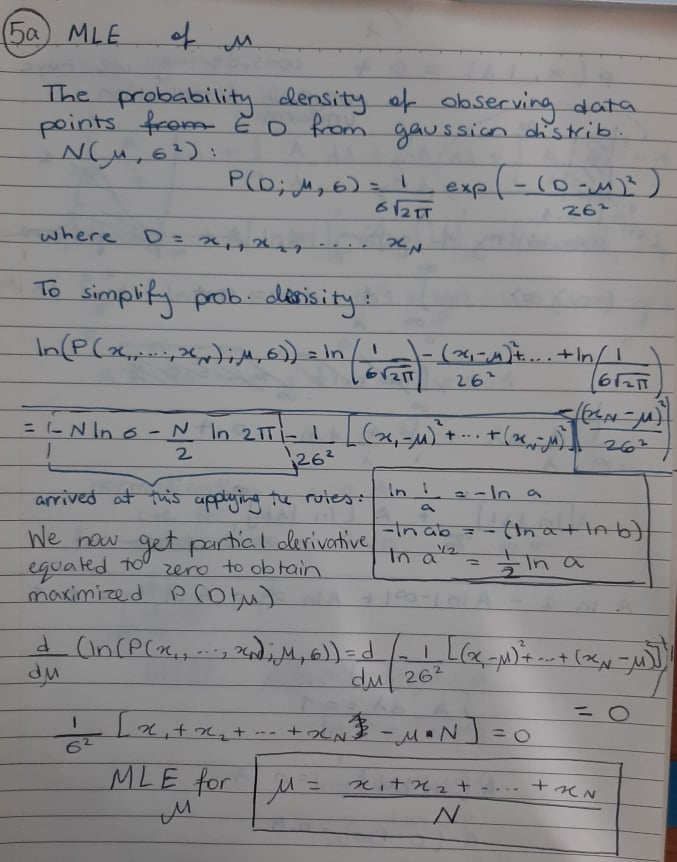

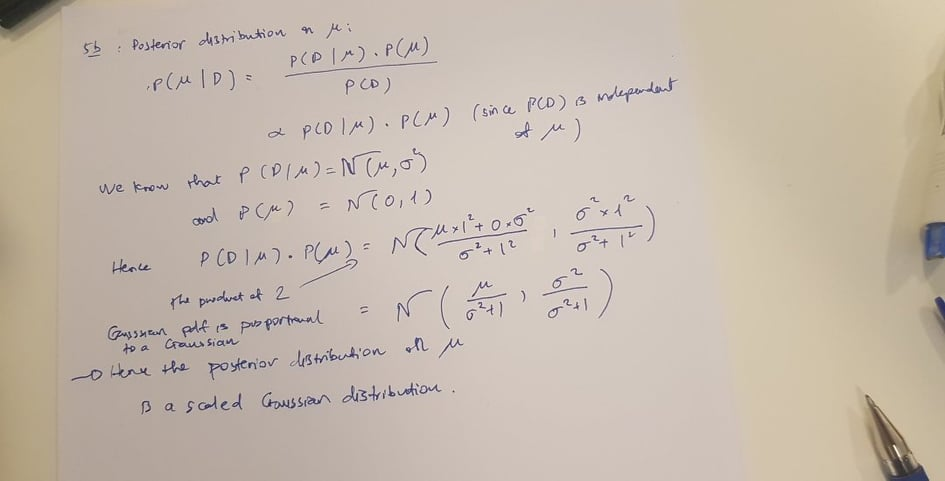

## Problem 6

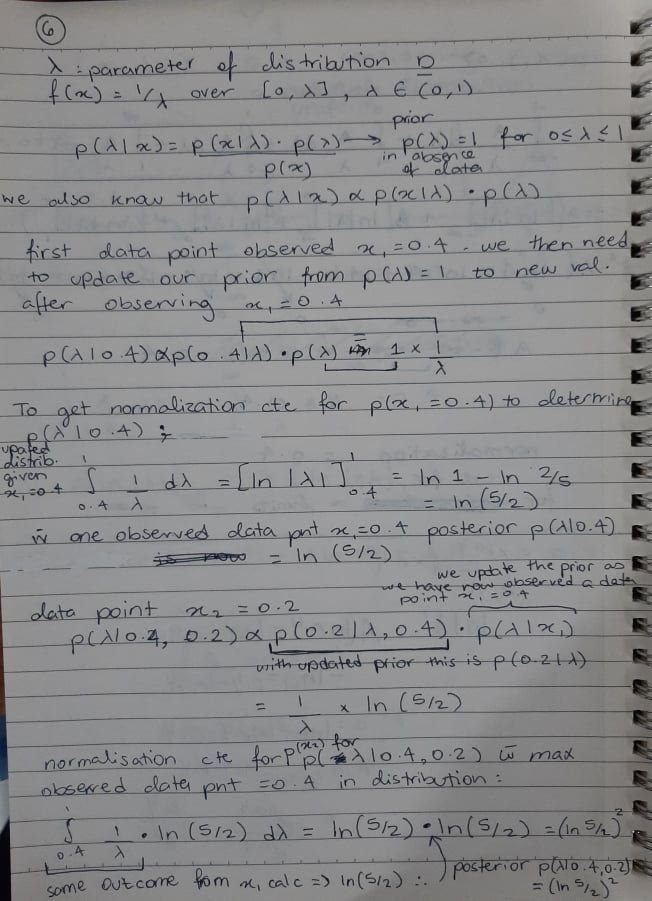

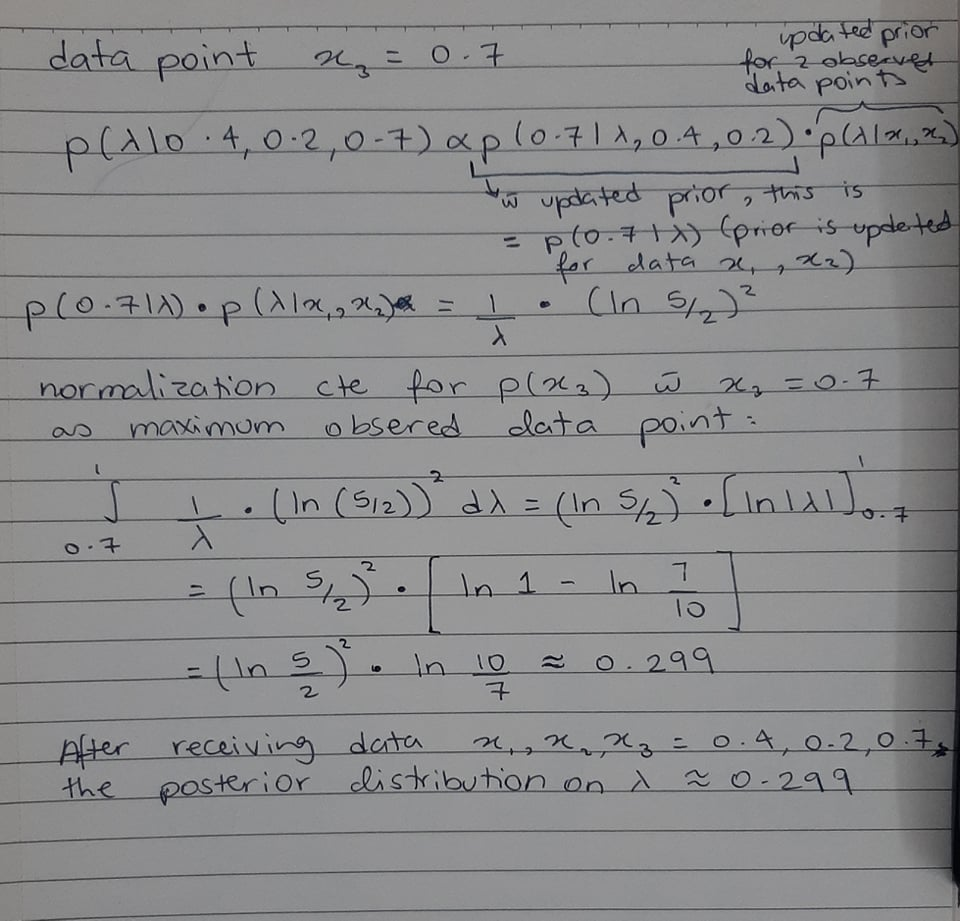